# PSO IMPLEMENTATION: ROSENBROCK (BANANA) FUNCTION

## 1. Configuration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML, clear_output

In [ ]:

FUNCTION_NAME = "Rosenbrock (Banana)"
BOUNDS = [-2, 2]
PARTICLES = 50
ITERATIONS = 50
# Adaptive Inertia Parameters
W_MAX = 0.9
W_Min = 0.4
C1 = 1.4 # Cognitive
C2 = 1.4 # Social

## 2. The Objective Function





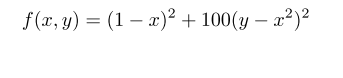

In [ ]:

def banana_function(x, y):
    # Global Minimum at (1, 1)
    a = 1
    b = 100
    return (a - x)**2 + b * (y - x**2)**2

## 3. Initialization

In [ ]:

print(f"Initializing {FUNCTION_NAME} Optimization...")
# Random positions and velocities
px = np.random.uniform(BOUNDS[0], BOUNDS[1], PARTICLES)
py = np.random.uniform(BOUNDS[0], BOUNDS[1], PARTICLES)
vx = np.random.uniform(-1, 1, PARTICLES)
vy = np.random.uniform(-1, 1, PARTICLES)

# Initialize Memory
pbest_x = px.copy()
pbest_y = py.copy()
pbest_val = banana_function(px, py)

# Find initial Global Best
min_idx = np.argmin(pbest_val)
gbest_x = pbest_x[min_idx]
gbest_y = pbest_y[min_idx]
gbest_val = pbest_val[min_idx]

# History lists for plotting/video
history_pos = []
convergence_curve = []

Initializing Rosenbrock (Banana) Optimization...


## 4. Optimization Loop (with Adaptive Inertia)

In [ ]:

for i in range(ITERATIONS):
    # Record history
    history_pos.append(np.column_stack((px, py)))
    convergence_curve.append(gbest_val)

    # A. Calculate Adaptive Inertia (Linearly Decreasing)
    w = W_MAX - ((W_MAX - W_Min) * i / ITERATIONS)

    # B. Update Velocity
    r1 = np.random.rand(PARTICLES)
    r2 = np.random.rand(PARTICLES)

    vx = (w * vx) + (C1 * r1 * (pbest_x - px)) + (C2 * r2 * (gbest_x - px))
    vy = (w * vy) + (C1 * r1 * (pbest_y - py)) + (C2 * r2 * (gbest_y - py))

    # C. Update Position
    px = px + vx
    py = py + vy
    # Clip to bounds
    px = np.clip(px, BOUNDS[0], BOUNDS[1])
    py = np.clip(py, BOUNDS[0], BOUNDS[1])

    # D. Evaluation
    current_val = banana_function(px, py)

    # E. Update Personal Best
    better_mask = current_val < pbest_val
    pbest_x[better_mask] = px[better_mask]
    pbest_y[better_mask] = py[better_mask]
    pbest_val[better_mask] = current_val[better_mask]

    # F. Update Global Best
    min_idx = np.argmin(pbest_val)
    if pbest_val[min_idx] < gbest_val:
        gbest_val = pbest_val[min_idx]
        gbest_x = pbest_x[min_idx]
        gbest_y = pbest_y[min_idx]

print(f"Optimization Complete. Best Value: {gbest_val:.6f} at ({gbest_x:.4f}, {gbest_y:.4f})")

Optimization Complete. Best Value: 0.000000 at (1.0000, 0.9999)


## 5. Report Visualsation

Saved 'banana_convergence.png'


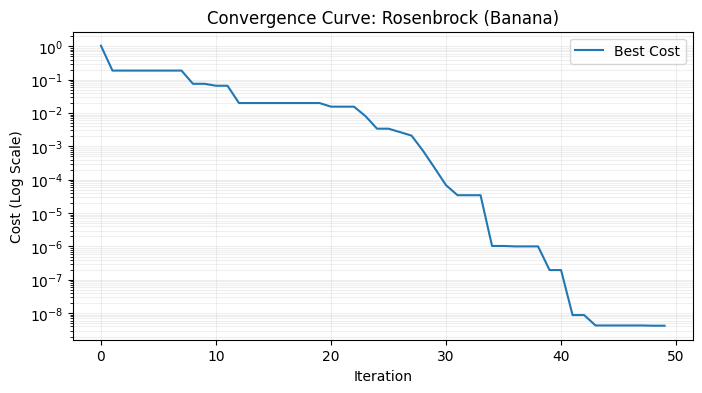

Saved 'banana_pso.mp4'
Simulation Complete!
Target Location: x=420.96, y=420.96
Your Swarm Found: x=1.0000, y=0.9999


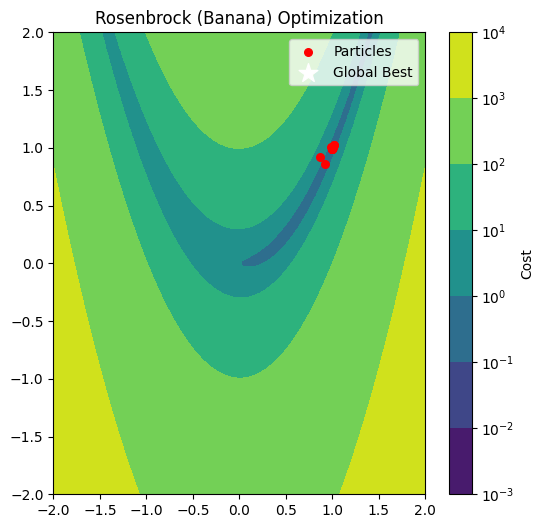

In [ ]:

# Plot 1: Convergence Curve (Evidence of Intelligence)
plt.figure(figsize=(8, 4))
plt.plot(convergence_curve, label='Best Cost')
plt.yscale('log') # Log scale highlights convergence better
plt.title(f'Convergence Curve: {FUNCTION_NAME}')
plt.xlabel('Iteration')
plt.ylabel('Cost (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()
plt.savefig('banana_convergence.png')
print("Saved 'banana_convergence.png'")
plt.show()

# Plot 2: Video Animation
fig, ax = plt.subplots(figsize=(6, 6))
# Background Contour
x_grid = np.linspace(BOUNDS[0], BOUNDS[1], 100)
y_grid = np.linspace(BOUNDS[0], BOUNDS[1], 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = banana_function(X, Y)
from matplotlib.colors import LogNorm
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis', norm=LogNorm())
plt.colorbar(contour, label='Cost')

scatter = ax.scatter([], [], c='red', s=30, label='Particles')
leader = ax.scatter([], [], c='white', marker='*', s=200, label='Global Best')
ax.set_title(f"{FUNCTION_NAME} Optimization")
ax.legend()

def animate(frame):
    positions = history_pos[frame]
    scatter.set_offsets(positions)
    # We approximate leader position for visual simplicity in animation
    # (To be perfectly exact we'd need to track gbest history too)
    return scatter,

anim = FuncAnimation(fig, animate, frames=ITERATIONS, interval=100, blit=True)
anim.save('banana_pso.mp4', writer='ffmpeg', fps=15)
print("Saved 'banana_pso.mp4'")
print("Simulation Complete!")
print(f"Your Swarm Found: x={gbest_x:.4f}, y={gbest_y:.4f}")